<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

### Names of students:
Junyi Gu  (86351079) 
<br>
Haichao Sun (25089153)

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  
[Explanatory model](#Explanatory)


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>


### Import the data

In [1]:
library(fpp2)
library(seasonal)
library(repr)

Warning message:
"package 'fpp2' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.3.6     ✔ fma       2.4  
✔ forecast  8.19      ✔ expsmooth 2.3  

Warning message:
"package 'forecast' was built under R version 4.2.2"
Warning message:
"package 'fma' was built under R version 4.2.2"
Warning message:
"package 'expsmooth' was built under R version 4.2.2"


Warning message:
"package 'seasonal' was built under R version 4.2.2"


In [2]:
yvr <- read.csv(file.choose(), header=TRUE)


### Time plot

In [3]:
print(yvr)

     month energy mean.temp total.area total.passengers domestic.passengers
1   Jan-97   5958       3.9     202966          1068.36              573.84
2   Feb-97   5859       5.0     202966          1040.30              570.36
3   Mar-97   5230       6.3     202966          1195.47              632.68
4   Apr-97   5654       9.1     202966          1086.42              599.11
5   May-97   5618      14.0     202966          1244.52              673.70
6   Jun-97   5963      15.6     202966          1352.89              729.84
7   Jul-97   5920      17.7     202966          1517.17              807.90
8   Aug-97   6430      19.0     202966          1668.83              869.27
9   Sep-97   6053      15.9     202966          1348.09              714.28
10  Oct-97   5514      10.4     202966          1195.02              662.97
11  Nov-97   5633       7.4     202966           964.90              523.70
12  Dec-97   5545       4.8     202966          1136.60              616.81
13  Jan-98  

In [4]:
#Creating Time-Series of Energy Consumption
energy_ts <- ts(yvr$energy, start = 1997, frequency = 12)

In [5]:
#View of the whole dataset
print(energy_ts)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1997 5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 5633 5545
1998 5825 5617 4970 5331 5233 5557 5841 6489 6138 5539 5667 5730
1999 6030 5954 5326 5672 5301 5777 5831 6345 6309 6068 6372 6302
2000 6570 6497 6106 6330 6070 6401 6697 7003 6760 6192 6334 6371
2001 6501 6435 5674 6206 6094 6544 6602 6886 6677 6133 6088 6291
2002 6349 6286 5588 5914 5716 6235 6483 6708 6553 5837 5961 5828
2003 6126 6020 5375 5741 5635 6199 6376 6844 6379 5822 5884 5820
2004 6105 6014 5552 5908 5956 6399 6572 7043 6418 5741 6497 6207
2005 6504 6337 5644 6148 6141 6521 6661 7387 6815 6173 6319 6434
2006 6544 6534 5809 6290 6202 6492 6733 7040 6690 6220 6497 6582
2007 6802 6947 6443 6835 6619 7096 7291 7642 7443 6921 7338 7358
2008 7540 7543 6923 7351 7084 7288 7788 8120 7628 7099 7385 7481
2009 7852 7773 6859 7410 6918 7759 7718 8630 8121 7423 7809 7841
2010 8171 8101 7306 7877 7575 7740 8149 8813 8154 7635 7932 7975


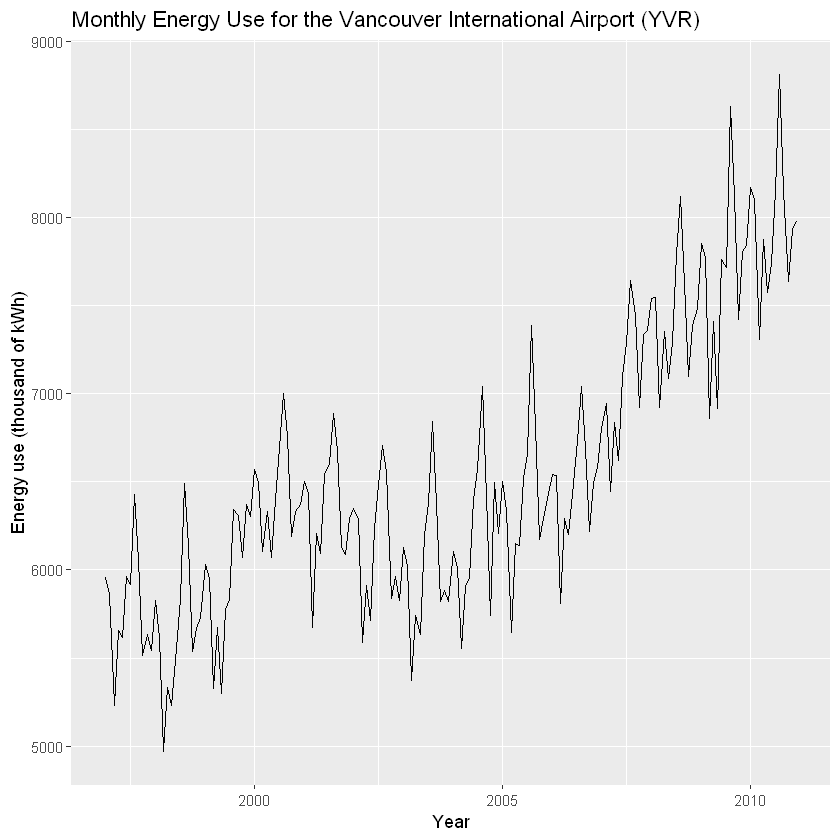

In [6]:
#Plot the time-series data
autoplot(energy_ts) +
  ggtitle("Monthly Energy Use for the Vancouver International Airport (YVR)") + ylab("Energy use (thousand of kWh)") + xlab("Year")


### Box-Cox transformation

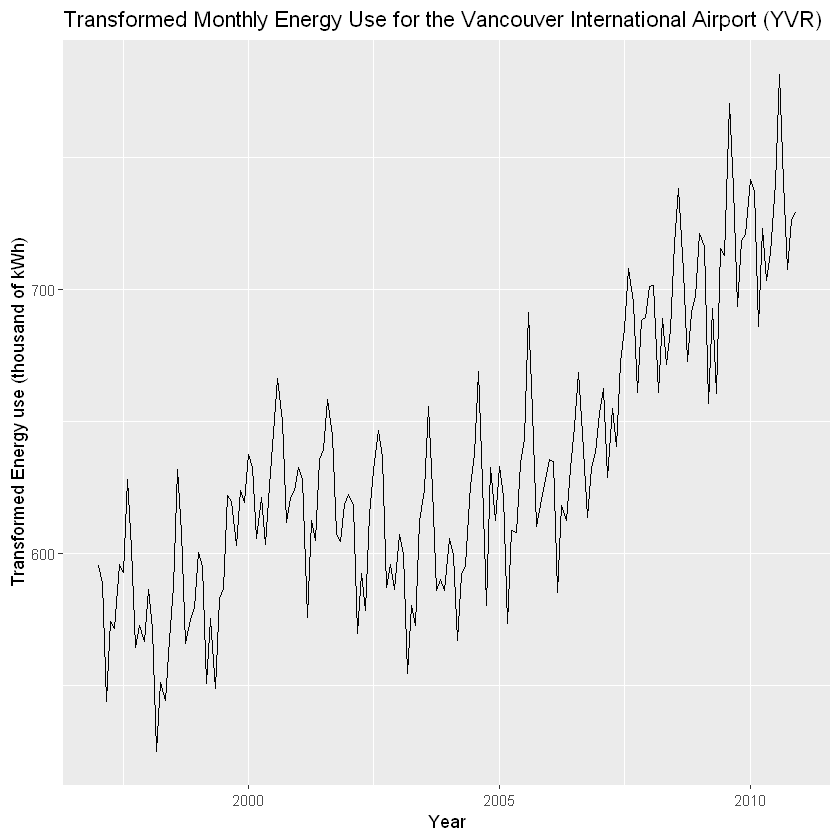

In [7]:
#Box-Cox Transformation and plot
lambda <- BoxCox.lambda(energy_ts)
autoplot(BoxCox(energy_ts,lambda)) + 
  ylab("Transformed Energy use (thousand of kWh)") + xlab("Year") + ggtitle("Transformed Monthly Energy Use for the Vancouver International Airport (YVR)")


### Calendar adjustment for number of days in each month

In [8]:
#View of the whole dataset
print(energy_ts)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1997 5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 5633 5545
1998 5825 5617 4970 5331 5233 5557 5841 6489 6138 5539 5667 5730
1999 6030 5954 5326 5672 5301 5777 5831 6345 6309 6068 6372 6302
2000 6570 6497 6106 6330 6070 6401 6697 7003 6760 6192 6334 6371
2001 6501 6435 5674 6206 6094 6544 6602 6886 6677 6133 6088 6291
2002 6349 6286 5588 5914 5716 6235 6483 6708 6553 5837 5961 5828
2003 6126 6020 5375 5741 5635 6199 6376 6844 6379 5822 5884 5820
2004 6105 6014 5552 5908 5956 6399 6572 7043 6418 5741 6497 6207
2005 6504 6337 5644 6148 6141 6521 6661 7387 6815 6173 6319 6434
2006 6544 6534 5809 6290 6202 6492 6733 7040 6690 6220 6497 6582
2007 6802 6947 6443 6835 6619 7096 7291 7642 7443 6921 7338 7358
2008 7540 7543 6923 7351 7084 7288 7788 8120 7628 7099 7385 7481
2009 7852 7773 6859 7410 6918 7759 7718 8630 8121 7423 7809 7841
2010 8171 8101 7306 7877 7575 7740 8149 8813 8154 7635 7932 7975


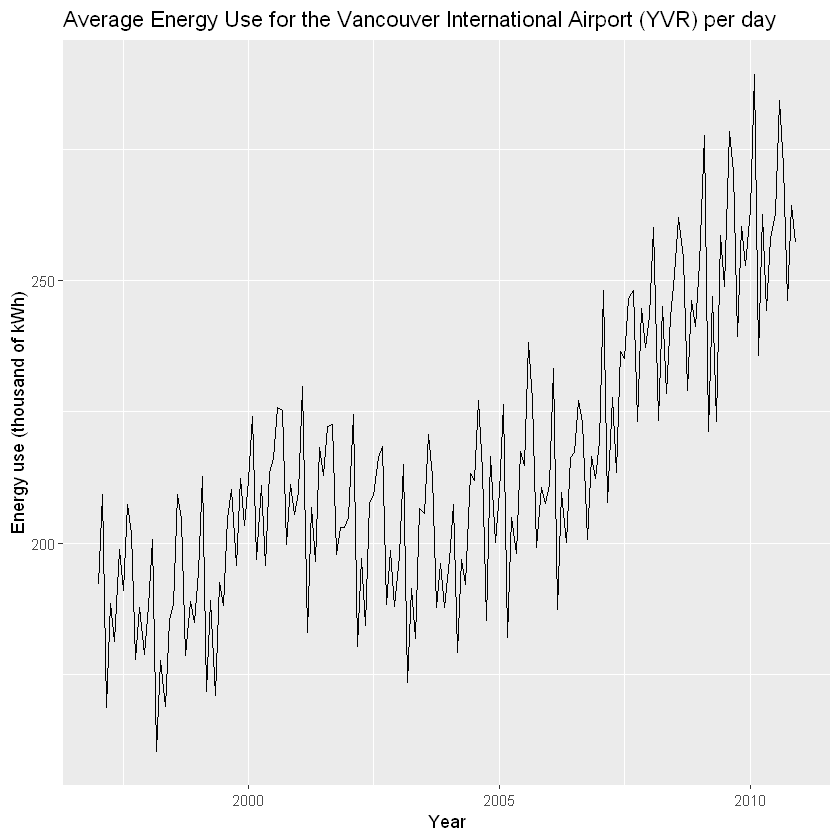

In [9]:
#Adjustment by month days and plot
autoplot(energy_ts/monthdays(energy_ts)) + 
  ggtitle("Average Energy Use for the Vancouver International Airport (YVR) per day") + ylab("Energy use (thousand of kWh)") + xlab("Year")

### Divide the data into the training set and the test set

In [10]:
# Training Set
energy.train <- window(energy_ts,start=1997,end=c(2007,12))
print(energy.train)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1997 5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 5633 5545
1998 5825 5617 4970 5331 5233 5557 5841 6489 6138 5539 5667 5730
1999 6030 5954 5326 5672 5301 5777 5831 6345 6309 6068 6372 6302
2000 6570 6497 6106 6330 6070 6401 6697 7003 6760 6192 6334 6371
2001 6501 6435 5674 6206 6094 6544 6602 6886 6677 6133 6088 6291
2002 6349 6286 5588 5914 5716 6235 6483 6708 6553 5837 5961 5828
2003 6126 6020 5375 5741 5635 6199 6376 6844 6379 5822 5884 5820
2004 6105 6014 5552 5908 5956 6399 6572 7043 6418 5741 6497 6207
2005 6504 6337 5644 6148 6141 6521 6661 7387 6815 6173 6319 6434
2006 6544 6534 5809 6290 6202 6492 6733 7040 6690 6220 6497 6582
2007 6802 6947 6443 6835 6619 7096 7291 7642 7443 6921 7338 7358


In [11]:
# Test Set
energy.test <- window(energy_ts,start=2008,end=c(2010,12))
print(energy.test)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2008 7540 7543 6923 7351 7084 7288 7788 8120 7628 7099 7385 7481
2009 7852 7773 6859 7410 6918 7759 7718 8630 8121 7423 7809 7841
2010 8171 8101 7306 7877 7575 7740 8149 8813 8154 7635 7932 7975


----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach (250 words max.) (2 marks)

The Vancouver YVR Airport is certified as a 4-star airport and is ranked as one of the largest and busiest airport in the world. Thus, the energy usage for YVR is enourmous and attacted attention, especially where near all of the electricity usage in BC is from renewable resources. The objective for this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR), in order to help the YVR representatives to negotiate more favourable contracts with energy suppliers in operation process. The dataset used for this project was taken from 14 years of records from the YVR database, which includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).
<br>

To get a more reliable result, a few methods will be used for this project. Firstly, decomposition will be used to identify the seasonality, trend and other unusual features. Secondly, with dividing training set and test set, a few selected ETS and Arima models based on these features will be tested along with a few basic methods such as mean, naive, seasonal naive and drift method. Based on the plots and accuracy measures, the best model will be selected, discussion and limitations will be indicated as well.

References:
<br>

https://skytraxratings.com/airports/vancouver-international-airport-rating#:~:text=Vancouver%20International%20Airport%20is%20Certified,service%2C%20and%20security%20%2F%20immigration.

https://www2.gov.bc.ca/gov/content/industry/electricity-alternative-energy#:~:text=British%20Columbia%20generates%20nearly%20all,%2C%20solar%2C%20and%20landfill%20gas.

----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

### Seasonality: 
The time period is 1 year. There are 13 peaks & 13 valleys. The peaks appear in August, while the valleys appear in March. The seasonal variation doesn't change as the series level increases.
- From the time plot of the monthly data, we can tell that the data has seasonality repeating every year and no seasonal variation.
- From the ACF plot, peaks at lags 12, 24, 26, 48 indicates the seasonality. Observations that are 12 lags apart are more similar to each other than observations 11 lags apart or 13 lags apart. 
- From the lagplot, we can find the lag 12 and lag 24 plot have the highest correlation. 
- From the decomposition plot, we can tell the seasonality is 1 year. 
- From the seasonal plot, we can find the peak is in August and the valley is in March in one year.


### Trend/cycle
The time plot is cubic, having an overall linear increasing trend with a linear decreasing trend between 2000 and 2004 as the series level increases.
- From the time plot of the monthly data, we can tell there's an overall increasing trend with a decreasing trend between 2000 and 2004. 
- From the ACF plot, the wavy pattern on the ACF shows that there's a trend. 
- From the decomposition plot, we can tell the trend is nearly linear. 


### Unusual features
In 1999, it appears two peaks in August and November which is different from that in other years and no extremely high or low values. 
- From the time plot of the monthly data, we can tell the line in 1999 is somewhat different from that in other years. 
- From the decomposition plot, we can tell there're big residuals in the remainder plot.
- From the seasonal plot, we can tell there're two peaks in August and November. 

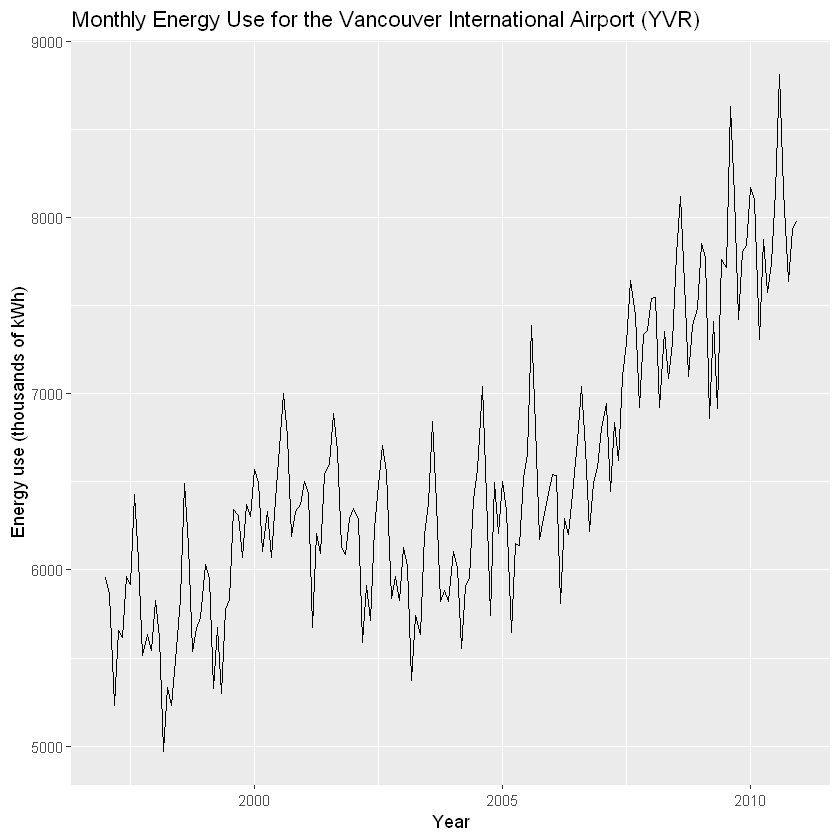

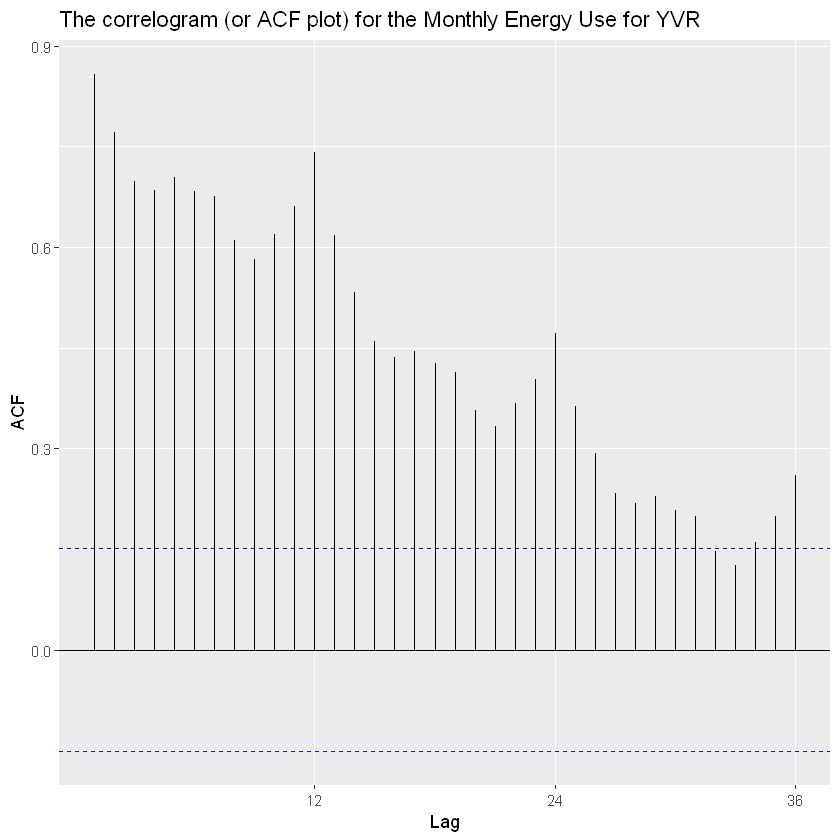

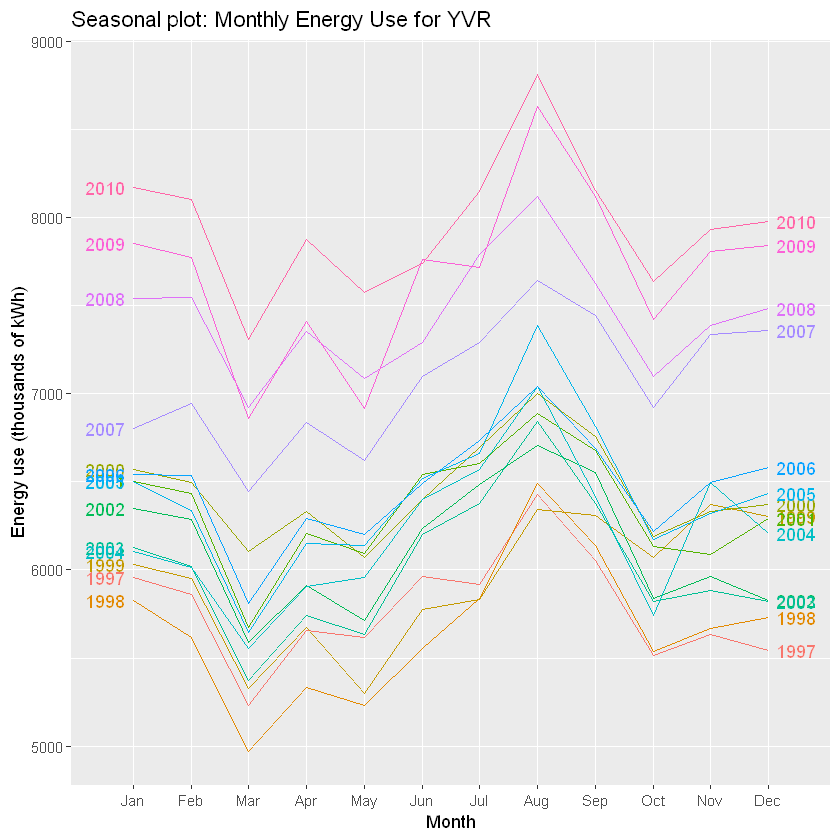

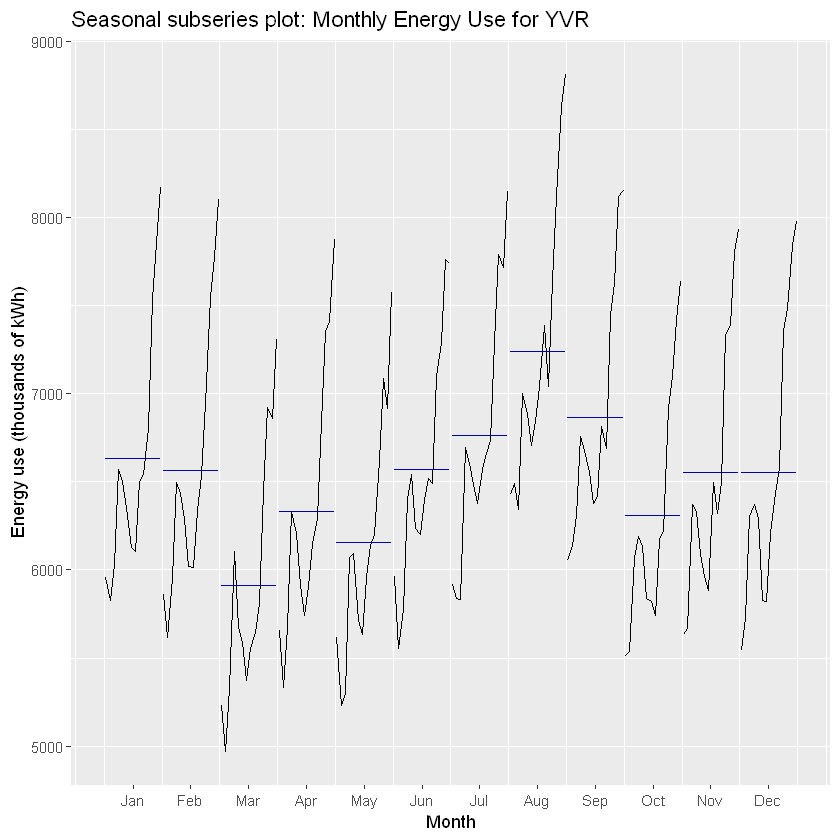

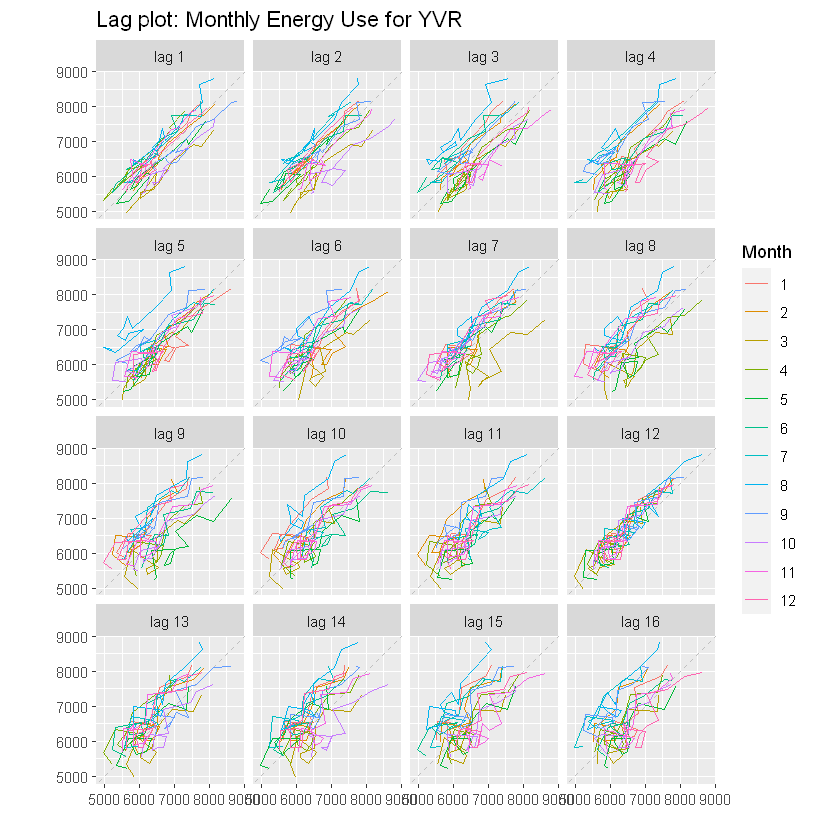

In [12]:
#Plots of electricity use data
autoplot(energy_ts) +
  ggtitle("Monthly Energy Use for the Vancouver International Airport (YVR)") + ylab("Energy use (thousands of kWh)") + xlab("Year")

ggAcf(energy_ts, lag.max = 36) +
  ggtitle("The correlogram (or ACF plot) for the Monthly Energy Use for YVR")

ggseasonplot(energy_ts, year.labels=TRUE, year.labels.left=TRUE) +
  ggtitle("Seasonal plot: Monthly Energy Use for YVR") +
  ylab("Energy use (thousands of kWh)")

ggsubseriesplot(energy_ts) +
  ggtitle("Seasonal subseries plot: Monthly Energy Use for YVR") +
  ylab("Energy use (thousands of kWh)")

gglagplot(energy_ts) +
  ggtitle("Lag plot: Monthly Energy Use for YVR")


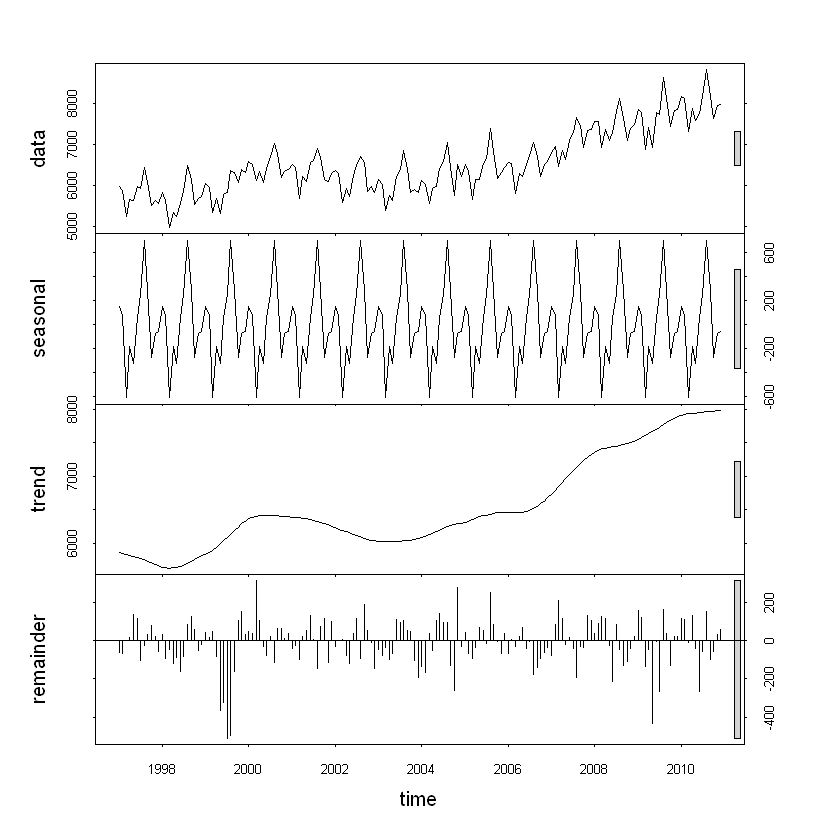

In [13]:
#STL decomposition
fit_stl_2 <- stl(energy_ts, t.window=18, s.window="periodic", robust=TRUE)  
plot(fit_stl_2)

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)


# Seasonality: 

The seasonality is caused by some seasonal factors that can be accounted for by a seasonal component. 

- First, the holiday seasons. As Vancouver is a popular tourist city, demand for flights would be particularly higher than usual, especially during summer breaks and school seasons. From the dataset, there are obviously more passengers between June and September in a year, especially August. 
- Second, the temperature. From the dataset, the temperature is obviously high between June and September in a year, especially August, so the energy use increases due to high demand of air-conditioning. Similarly, in winter there’re more demands for energy use. Therefore, the valley appearing on March is mainly due to the collaboration of comfortable temperatures and fewer demands for flights.



# Trend

The trend is caused by some overall factors that can be accounted for by a non-seasonal component.

- First, the total area of YVR increases throughout these years, which causes an overall increasing trend. As there're many facilities such as air-conditioning and other equipment supporting the operation of YVR needing to use energy, the use of energy would increase when the total area increases.

- Second, passengers is overall increasing while having a decrease between 2000 and 2004, which causes the decrease pattern in the trend. More passengers, more energy used for flights and service facilities is needed.


# Unusual Features

The unusual features are mainly in 1999.

- First, YVR expanded twice in 1999 while the number of passengers didn't increase correspondingly. In 1999, YVR expanded in January and June, so the basic use of energy for facilities increased. While total passengers didn't increase a lot for possible reasons that the demands didn't increase at that time or YVR didn't provide enough flights to meet possible increasing demands.
- Second, this unusual feature may be caused by human errors such as mistakes during data collection or management. 


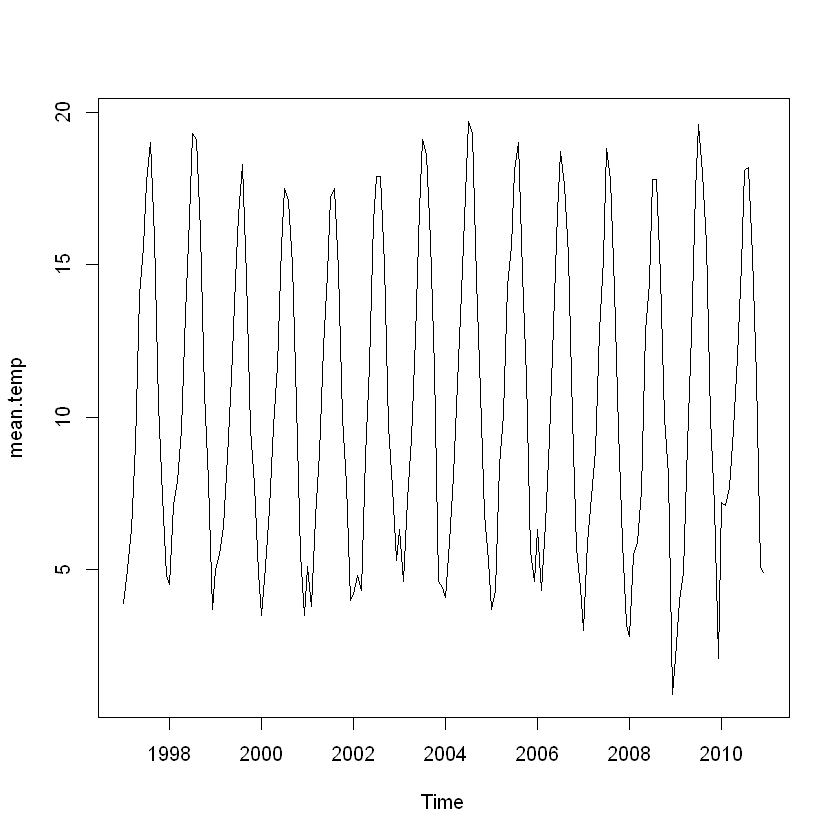

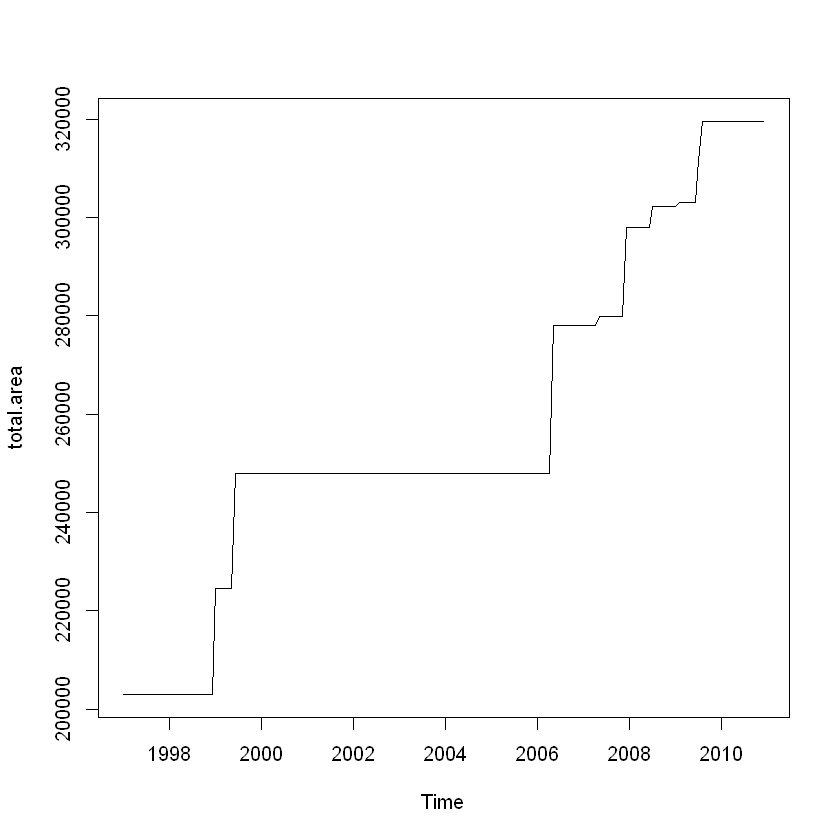

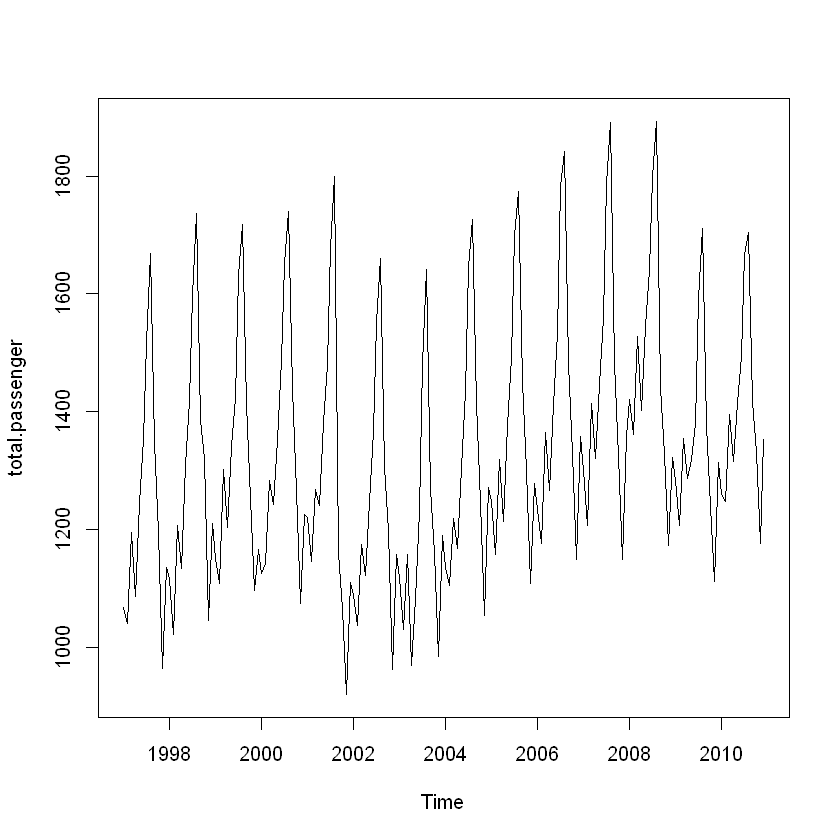

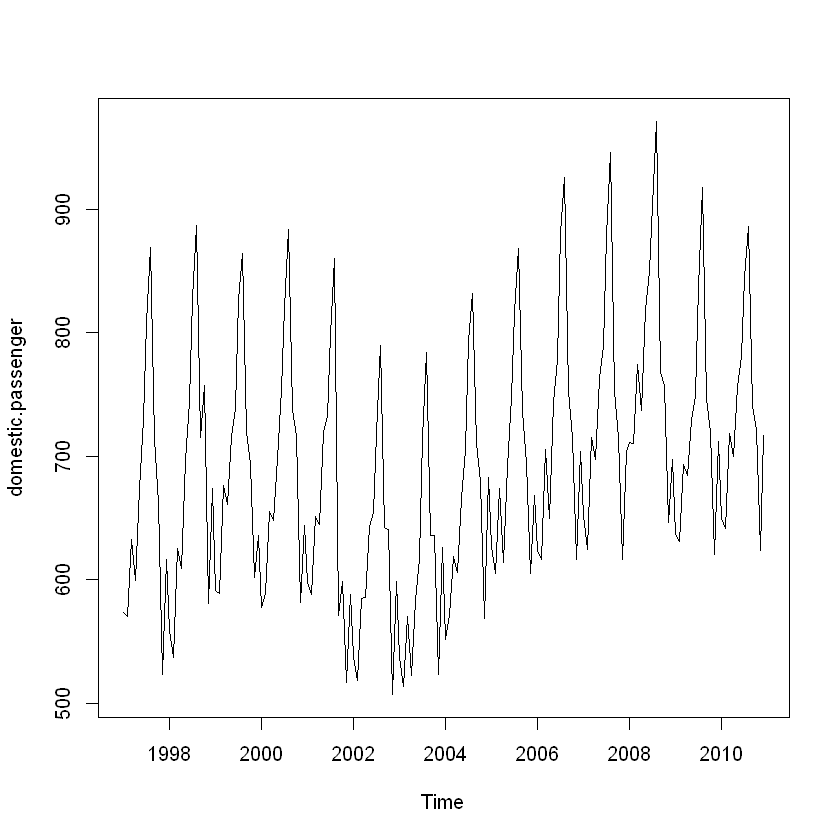

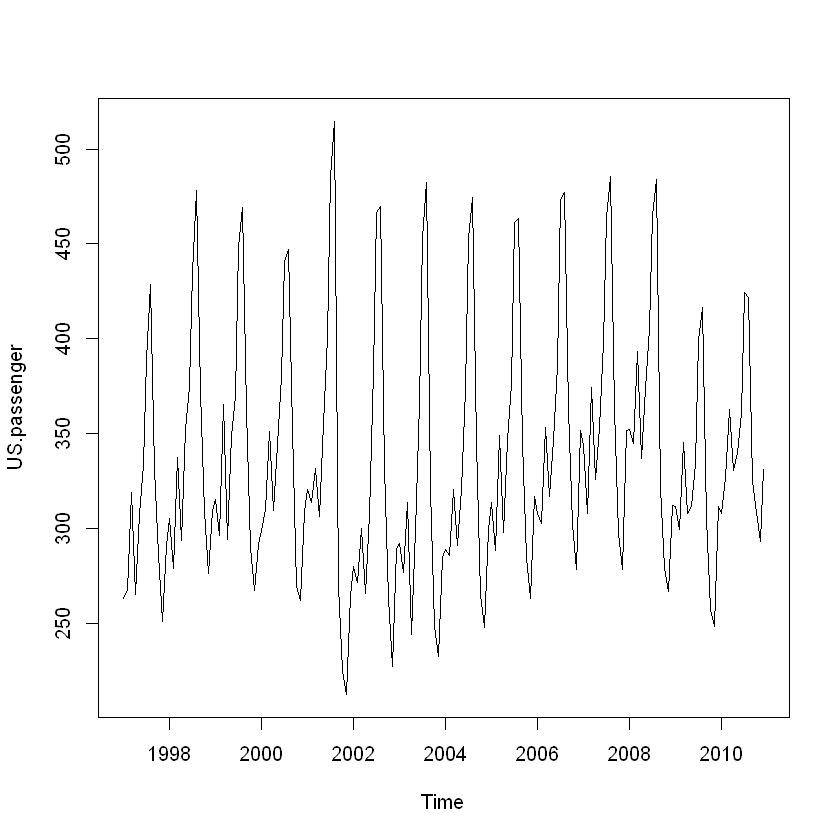

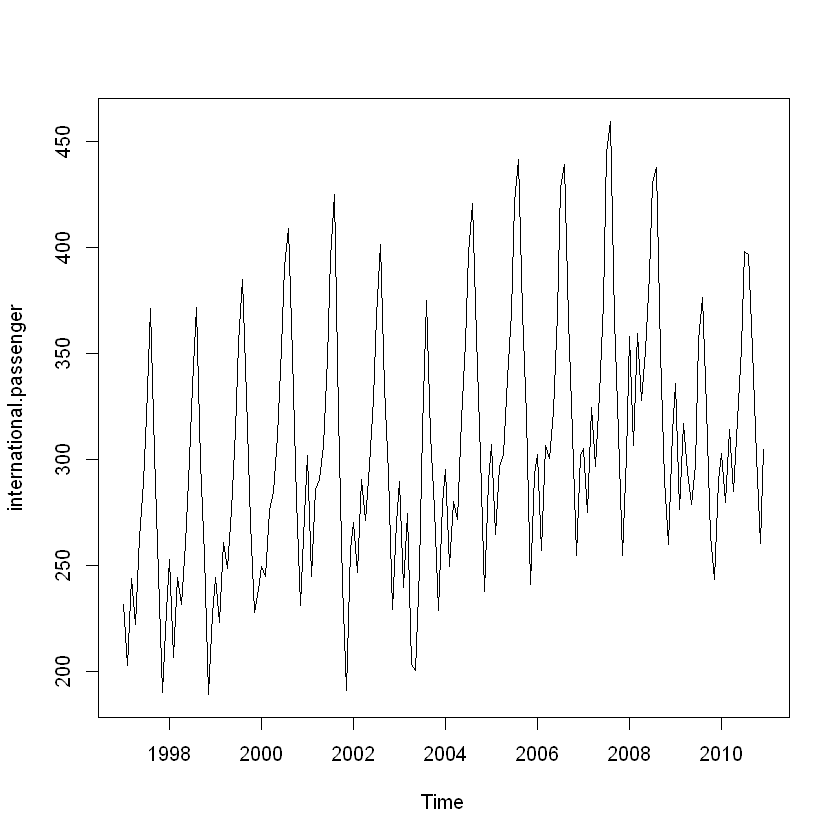

In [14]:
#Relevant plots
mean.temp <- ts(yvr[,3], start = c(1997,1), frequency = 12)
total.area <- ts(yvr[,4], start = c(1997,1), frequency = 12)
total.passenger <- ts(yvr[,5], start = c(1997,1), frequency = 12)
domestic.passenger <- ts(yvr[,6], start = c(1997,1), frequency = 12)
US.passenger <- ts(yvr[,7], start = c(1997,1), frequency = 12)
international.passenger <- ts(yvr[,8], start = c(1997,1), frequency = 12)

plot(mean.temp)
plot(total.area)
plot(total.passenger)
plot(domestic.passenger)
plot(US.passenger)
plot(international.passenger)


----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

 
## Visual comparison and assessment of basic methods (1.25 marks)


In [15]:
#Forecast for different basic methods
energy_m <- meanf(energy.train, h=36); energy_m
energy_n <- naive(energy.train, h=36); energy_n
energy_sn <- snaive(energy.train, h=36); energy_sn
energy_d <- rwf(energy.train,drift=TRUE,h=36); energy_d

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Feb 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Mar 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Apr 2008       6224.288 5565.191 6883.384 5212.019 7236.556
May 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Jun 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Jul 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Aug 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Sep 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Oct 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Nov 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Dec 2008       6224.288 5565.191 6883.384 5212.019 7236.556
Jan 2009       6224.288 5565.191 6883.384 5212.019 7236.556
Feb 2009       6224.288 5565.191 6883.384 5212.019 7236.556
Mar 2009       6224.288 5565.191 6883.384 5212.019 7236.556
Apr 2009       6224.288 5565.191 6883.38

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2008           7358 6881.502  7834.498 6629.259  8086.741
Feb 2008           7358 6684.130  8031.870 6327.405  8388.595
Mar 2008           7358 6532.681  8183.319 6095.784  8620.216
Apr 2008           7358 6405.004  8310.996 5900.518  8815.482
May 2008           7358 6292.518  8423.482 5728.486  8987.514
Jun 2008           7358 6190.823  8525.177 5572.956  9143.044
Jul 2008           7358 6097.304  8618.696 5429.933  9286.067
Aug 2008           7358 6010.260  8705.740 5296.809  9419.191
Sep 2008           7358 5928.506  8787.494 5171.777  9544.223
Oct 2008           7358 5851.181  8864.819 5053.519  9662.481
Nov 2008           7358 5777.635  8938.365 4941.040  9774.960
Dec 2008           7358 5707.362  9008.638 4833.567  9882.433
Jan 2009           7358 5639.962  9076.038 4730.487  9985.513
Feb 2009           7358 5575.107  9140.893 4631.301 10084.699
Mar 2009           7358 5512.531  9203.469 4535.598 10180.402
Apr 2009

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008           6802 6361.984 7242.016 6129.054 7474.946
Feb 2008           6947 6506.984 7387.016 6274.054 7619.946
Mar 2008           6443 6002.984 6883.016 5770.054 7115.946
Apr 2008           6835 6394.984 7275.016 6162.054 7507.946
May 2008           6619 6178.984 7059.016 5946.054 7291.946
Jun 2008           7096 6655.984 7536.016 6423.054 7768.946
Jul 2008           7291 6850.984 7731.016 6618.054 7963.946
Aug 2008           7642 7201.984 8082.016 6969.054 8314.946
Sep 2008           7443 7002.984 7883.016 6770.054 8115.946
Oct 2008           6921 6480.984 7361.016 6248.054 7593.946
Nov 2008           7338 6897.984 7778.016 6665.054 8010.946
Dec 2008           7358 6917.984 7798.016 6685.054 8030.946
Jan 2009           6802 6179.724 7424.276 5850.310 7753.690
Feb 2009           6947 6324.724 7569.276 5995.310 7898.690
Mar 2009           6443 5820.724 7065.276 5491.310 7394.690
Apr 2009           6835 6212.724 7457.27

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2008       7368.687 6888.736  7848.638 6634.665  8102.709
Feb 2008       7379.374 6698.054  8060.694 6337.386  8421.362
Mar 2008       7390.061 6552.487  8227.635 6109.103  8671.020
Apr 2008       7400.748 6429.999  8371.497 5916.116  8885.380
May 2008       7411.435 6322.092  8500.778 5745.429  9077.441
Jun 2008       7422.122 6224.428  8619.816 5590.407  9253.837
Jul 2008       7432.809 6134.439  8731.180 5447.123  9418.495
Aug 2008       7443.496 6050.460  8836.533 5313.031  9573.961
Sep 2008       7454.183 5971.340  8937.027 5186.370  9721.997
Oct 2008       7464.870 5896.244  9033.497 5065.863  9863.878
Nov 2008       7475.557 5824.544  9126.571 4950.550 10000.564
Dec 2008       7486.244 5755.756  9216.733 4839.691 10132.798
Jan 2009       7496.931 5689.495  9304.367 4732.696 10261.166
Feb 2009       7507.618 5625.452  9389.785 4629.093 10386.144
Mar 2009       7518.305 5563.371  9473.239 4528.492 10508.119
Apr 2009

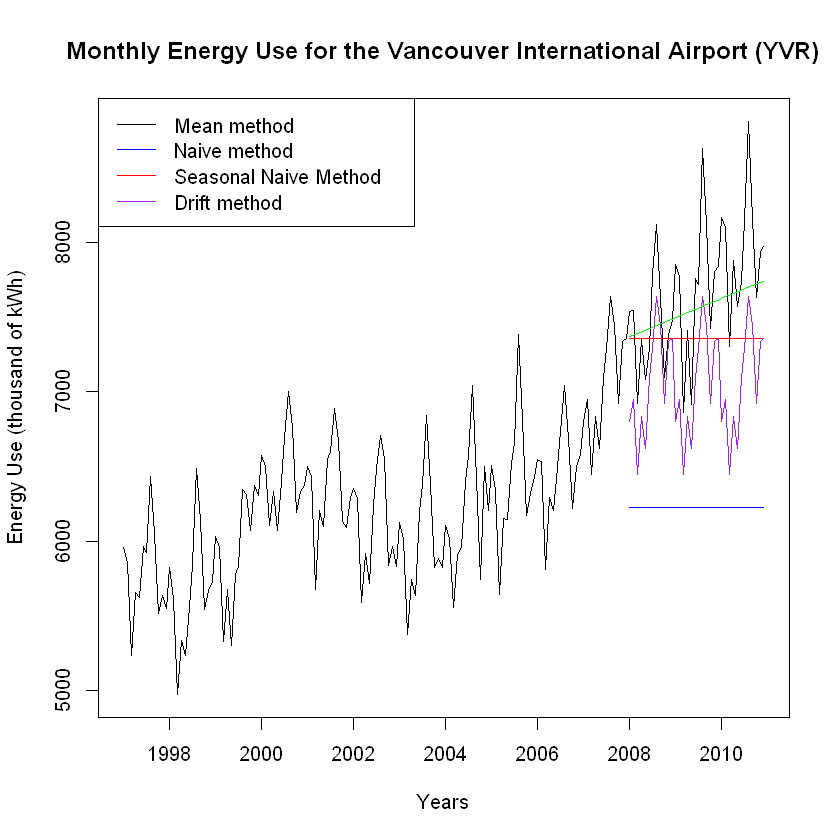

In [16]:
#Plotting training, test sets and forecasts using different basic methods
plot(energy_ts,main="Monthly Energy Use for the Vancouver International Airport (YVR)", ylab="Energy Use (thousand of kWh)",
     xlab="Years")
lines(energy_m$mean,col = "blue")
lines(energy_n$mean,col = "red")
lines(energy_sn$mean,col = "purple")
lines(rwf(energy.train,drift=TRUE,h=36)$mean,col = "green")
legend("topleft",lty=1,col=c(1,"blue","red","purple","green"), legend=c("Mean method","Naive method",
                                                "Seasonal Naive Method",
                                              "Drift method"))

The drift method seems to produce the best forecasts of the test set, which matches the trend.

The forecast of the mean method is the worst, which totally unmatched. 

The forecast of the naive method is not good, which neither shows the trend nor shows the seasonality.

The forecast of the seasonal naive method is not good as well, which doesn't show the trend so that cannot reflect actual test data.

## Accuracy measures (1 mark)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [17]:
#Accuracy measures on test set using different basic methods
method <- c("mean method", "naive method", "seasonal naive method","drift method")
cbind(method, rbind(round(accuracy(energy_m, energy.test)[2,c(2,3,5,6)],1),
                    round(accuracy(energy_n, energy.test)[2,c(2,3,5,6)],1),
                    round(accuracy(energy_sn, energy.test)[2,c(2,3,5,6)],1),
                    round(accuracy(energy_d, energy.test)[2,c(2,3,5,6)],1)))

method,RMSE,MAE,MAPE,MASE
mean method,1528.5,1463.8,18.8,5.5
naive method,550.1,443.2,5.6,1.7
seasonal naive method,698.7,626.8,8,2.4
drift method,416,328.5,4.2,1.2


## Comparison of basic methods (1 mark)

The dirft method seens to forecast the test set the best, because its forecast plot matches the test set best and it has lowest accuracy measures such as MAE and RMSE. 


MASE stands for the mean absolute scaled error, and MASE of one data point is defined as the (one-period-ahead) forecast error divided by the average forecast error of the naive method. 


If the MASE is greater than 1, then the model is worse than the naive model on training data, and the lower the MASE, the better the model is compared to the naive model.


For the drift model which has a MASE of 1.2, we can say the drift model is better than other models with a higher MASE on test data.

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

In [18]:
#Multiplicative error, additive trend and additive seasonality
energy_ets_maa <- ets(energy.train, model="MAA", damped=FALSE) 
summary(energy_ets_maa)

ETS(M,A,A) 

Call:
 ets(y = energy.train, model = "MAA", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.8082 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5803.689 
    b = 17.436 
    s = -37.9185 -34.4259 -248.9098 320.0811 666.5463 231.972
           63.7197 -351.3296 -188.4109 -568.7838 53.8096 93.6498

  sigma:  0.0218

     AIC     AICc      BIC 
1957.628 1962.996 2006.636 

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE      MASE
Training set -6.611667 126.3696 99.4423 -0.1458104 1.602955 0.3752775
                    ACF1
Training set -0.02754951

## What are the estimates of the smoothing parameters? (0.25 marks)

From the result above we would be able to see that:
<br>

alpha = 0.8021
<br>
beta = 0.0002
<br>
gamma = 0.0001
<br>
phi = 0.8004
<br>

(rounded to 4-digit numbers)

## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

From the decomposition graph earlier, we would conclude that the time series has an additive trend, thus models with additive trend and both additive and multiplicative seasonality were tested. Besides, compared to other candidate ETS models, MAA has a significant lower error term on both training set and test set, so we would conclude that MAA model is the most appropriate. Compared to drift method (the best basic method), the RMSE and other error terms are smaller.


## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

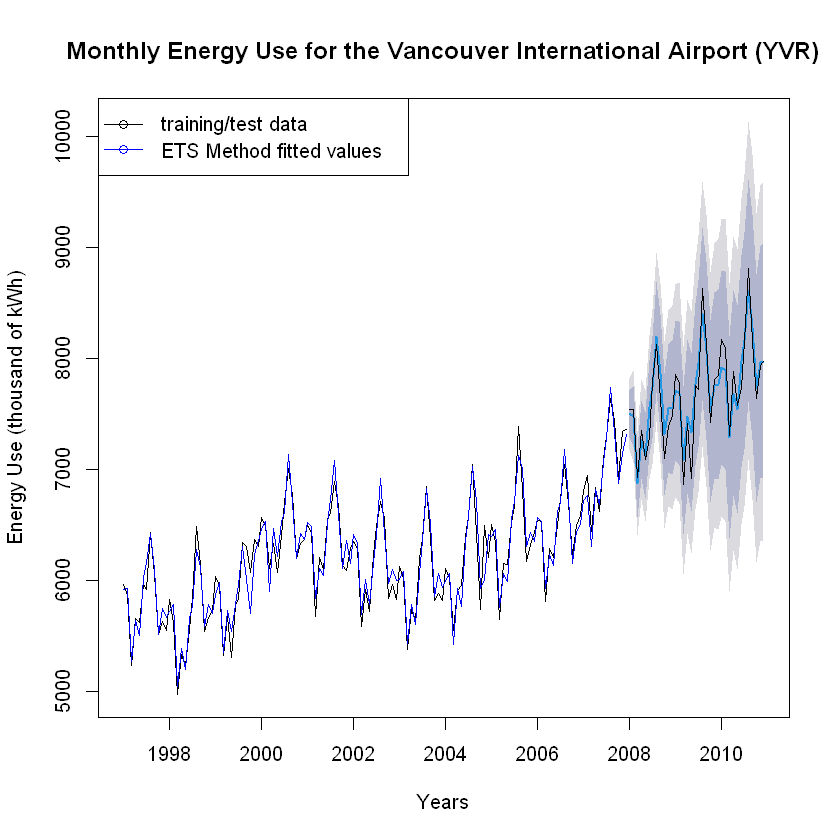

In [19]:
#Plotting training and test sets, along with ETS forecast on test set and the forecast interval 
plot(forecast(ets(energy.train, model="MAA", damped=FALSE),h = 36), ylab="Energy Use (thousand of kWh)", 
     xlab="Years", main="Monthly Energy Use for the Vancouver International Airport (YVR)")
lines(energy.train)
lines(energy.test)
lines(fitted(energy_ets_maa), col = "blue")
legend("topleft",lty=1, col=c(1,"blue"), 
       c("training/test data", expression("ETS Method fitted values")),pch=1)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

In [20]:
#Accuracy measures on training set
accuracy(energy_ets_maa)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-6.611667,126.3696,99.4423,-0.1458104,1.602955,0.3752775,-0.02754951


From the time series we can see that data are in thousands, so RMSE of 126.37 is relatively small. Besides, if comparing to other candidate models ( indicating in Appendix A, errors are very similar. It is not the lowest error one, however, for the training set, a very low error may indicate overfitting bias. Thus, test errors needs to be considered together.

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

Although for training error, ETS(M,A,A) is not the lowest, the test errors are the lowest compared to other candidate ETS models. For example, the MAA model has a lower training error, but the test error is much higher than MAA model, which may be a sign for overfitting. Thus, we consider ETS(M,A,A) to be the best ETS model.

(For accuracy measures of other candidate models, please refer to Appendix A)

In [21]:
#Test set errors
round(accuracy(forecast(energy_ets_maa, 36), energy.test)[2,c(2,3,5,6)],2)

RMSE    MAE   MAPE   MASE 
155.98 123.18   1.61   0.46

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

As we can see from the plot, we could be able to see that fitted values are very close to both training and test data, meaning that the error terms are small and ETS(M,A,A) did a good job, compare to other candidate models in Appendix A. Also, if we look at the RMSE, MAE, MAPE and MASE, this model is also the lowest. Compared to drift method (the best basic method), the RMSE and other error terms are also smaller.

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

a) As calculated below, mean of residuals are quite close to 0, indicating that there is no bias.
<br>

b) From the time plot of residuals, we would be able to see that residuals are evenly distributed around 0. From the lag plot, none of the years have a significant lag, and from the residuals are normally distributed, thus we would conclude that properties of residuals have meen met the requirements.
<br>

c) Hypothesis Testing:
<br>
H0: the first 24 autocorrelations are not significantly different from a white noise process
<br>
HA: the first 24 autocorrelations are significantly different from a white noise process
<br>

From the Ljung-Box test result, we can see that 24 lags are tested, where the test statistic is 12.47, and p-value is 0.1315 indicating that we failed to reject H0, so we cannot reject that the first 24 autocorrelations are not significantly different from a white noise process.

In [22]:
mean(residuals(energy_ets_maa))

[1] -0.001043112


	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 12.469, df = 8, p-value = 0.1315

Model df: 16.   Total lags used: 24



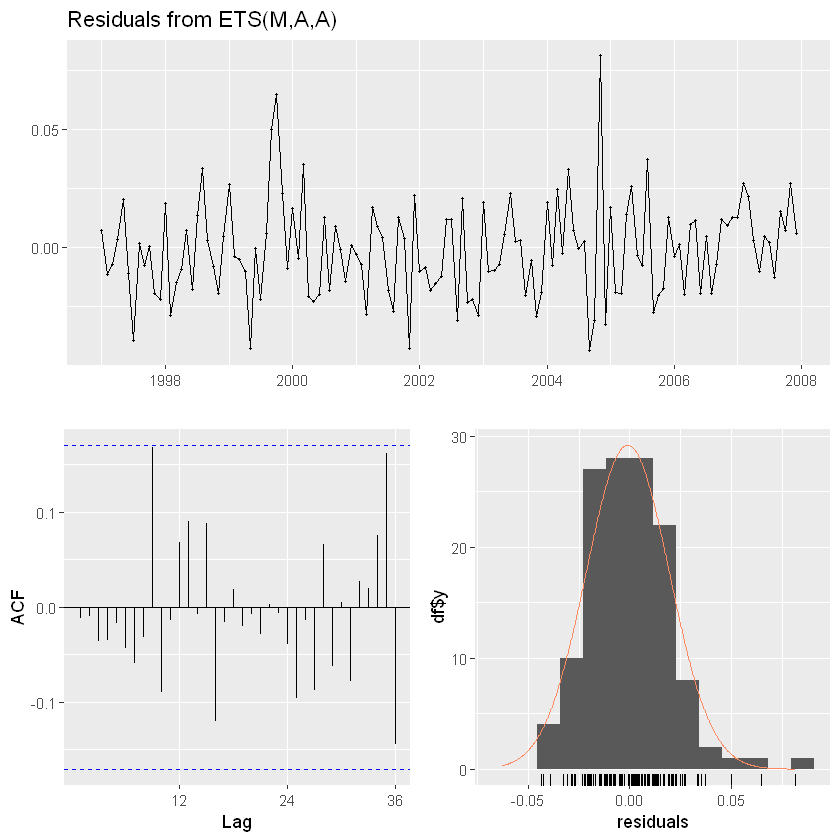

In [23]:
checkresiduals(energy_ets_maa)

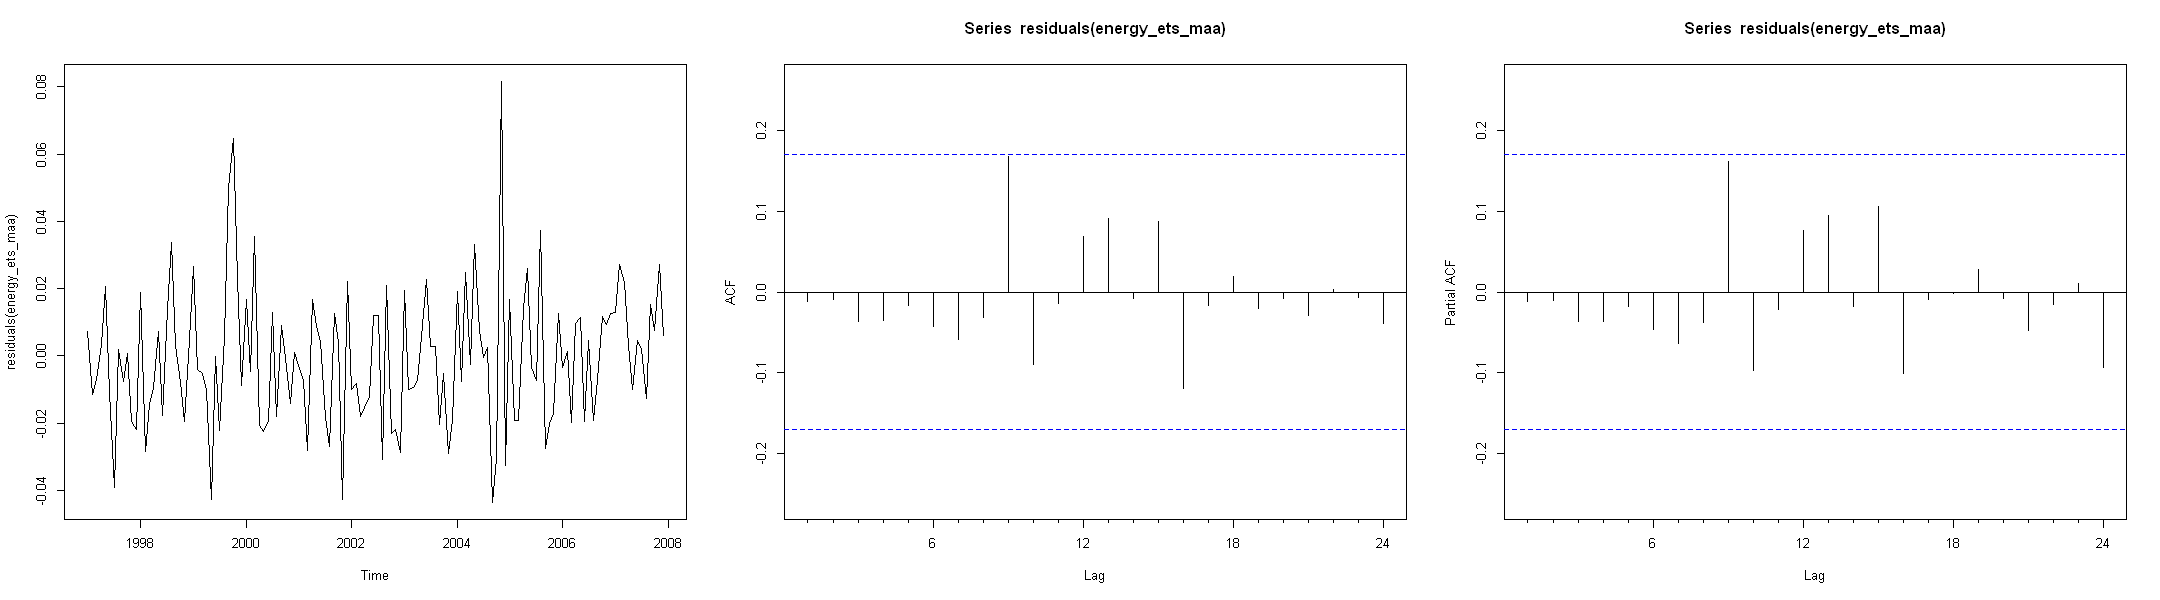

In [24]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow=c(1,3))

plot(residuals(energy_ets_maa))
Acf(residuals(energy_ets_maa))
Pacf(residuals(energy_ets_maa))

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

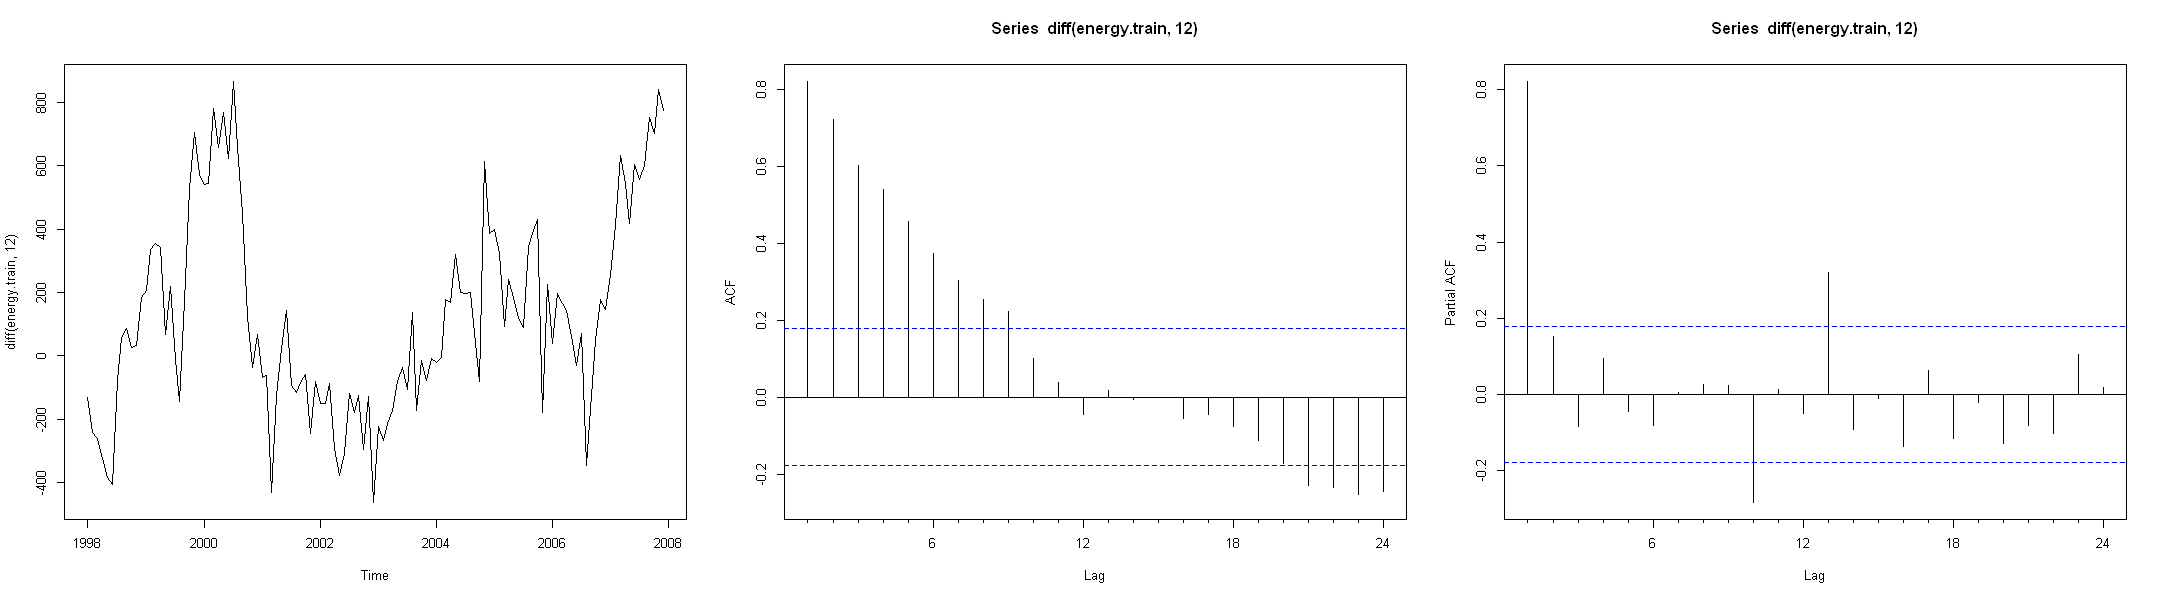

In [25]:
# Seasonal differencing
par(mfrow=c(1,3))
plot(diff(energy.train,12))
Acf(diff(energy.train,12))
Pacf(diff(energy.train,12))

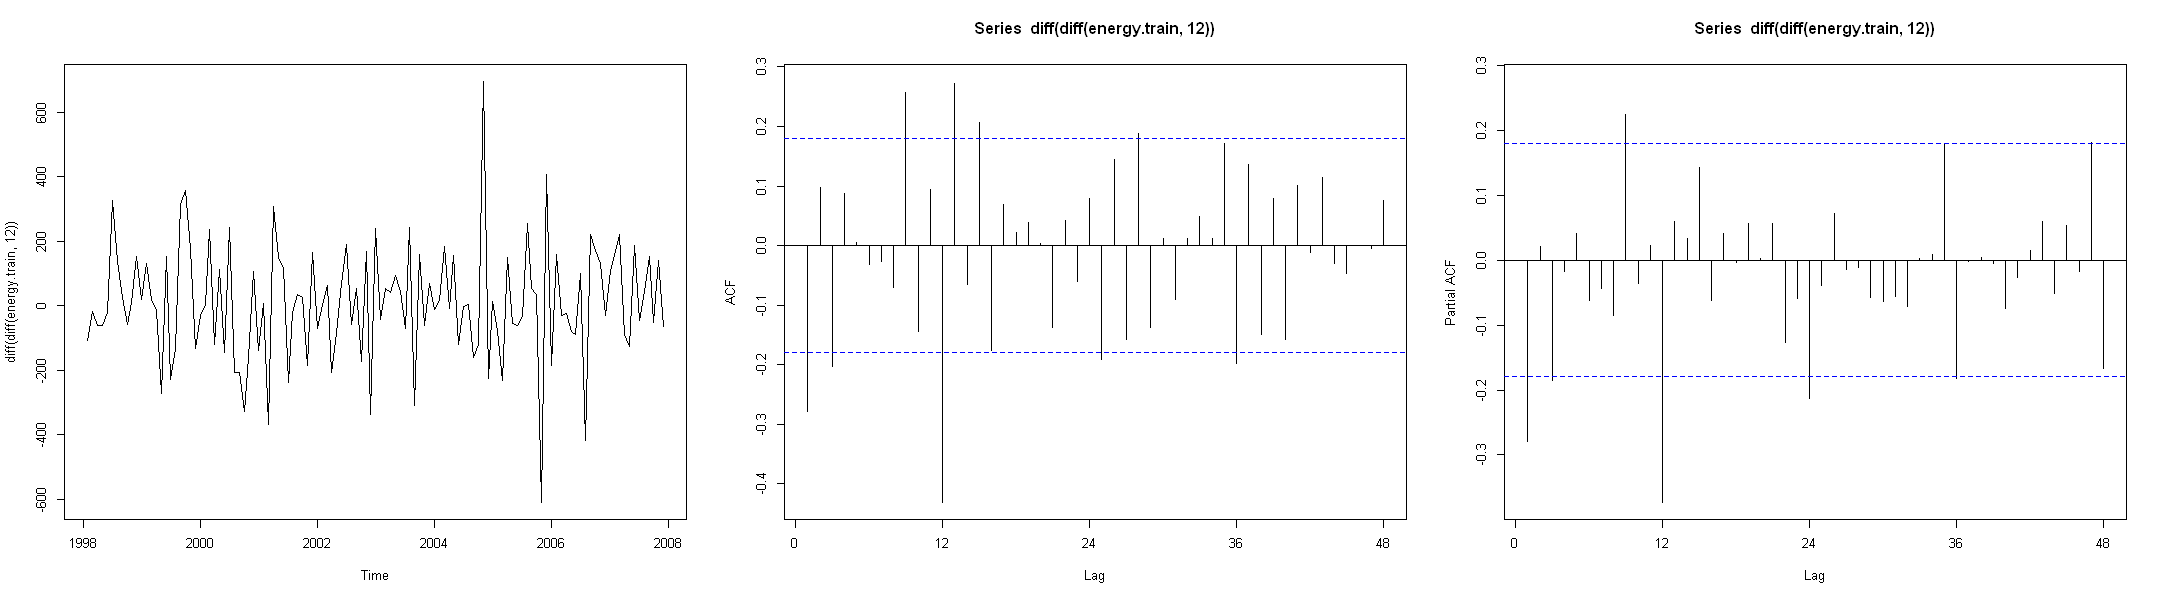

In [26]:
#First-order differencing
par(mfrow=c(1,3))
plot(diff(diff(energy.train, 12)))
Acf(diff(diff(energy.train, 12)), lag.max = 48)
Pacf(diff(diff(energy.train, 12)), lag.max = 48)

In [27]:
#Arima(1,1,0)x(0,1,1)[12] is the best ARIMA model that we would choose
fit.arima.1 <- Arima(energy.train, order=c(1, 1, 0), seasonal=c(0, 1, 1))

## What are the estimates of the parameters? (0.25 marks)

In [28]:
summary(fit.arima.1)

Series: energy.train 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
          ar1     sma1
      -0.1972  -0.8927
s.e.   0.0905   0.1794

sigma^2 = 18824:  log likelihood = -762.54
AIC=1531.08   AICc=1531.29   BIC=1539.42

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 9.495075 129.171 93.95688 0.1257726 1.494625 0.3545766 -0.01035696

## Appropriateness of model (2 marks)


The original time plot shows that there is seasonality that repeats every 12 months (this is the value of m), indicating that we should use D=1, doing seasonal differencing of lag-m (where m = the seasonal frequency) .


After the appropriate amount of seasonal differencing, the series has some trend, indicating that we should use d=1. doing a first-order differencing.


After appropriate differencing, the series should now be stationary, and we will view the ACF and PACF of the series after differencing.


We will start by looking at the seasonal lags only (m, 2m, 3m, etc.). In ACF polt, there're 1 significant continuous seasonal lag (lag 12). In PACF plot, there're 3 significant continuous seasonal lag (lag 12, 24, 36). It looks like the ACF is simpler with fewer significant seasonal lags. This plot indicates that we should include Q = 1 in our model.


Now we will look at the non-seasonal lags (up to but not including lag m). In ACF polt, there're 2 significant lags (lag 1 and 3) before the first time of decaying to zero. In PACF plot, there's 1 significant lag (lag 1) before the first time of decaying to zero.It looks like the PACF is simpler with fewer significant lags. This plot indicates that we should include p = 1 in our model.

## Model plot (0.75 marks)


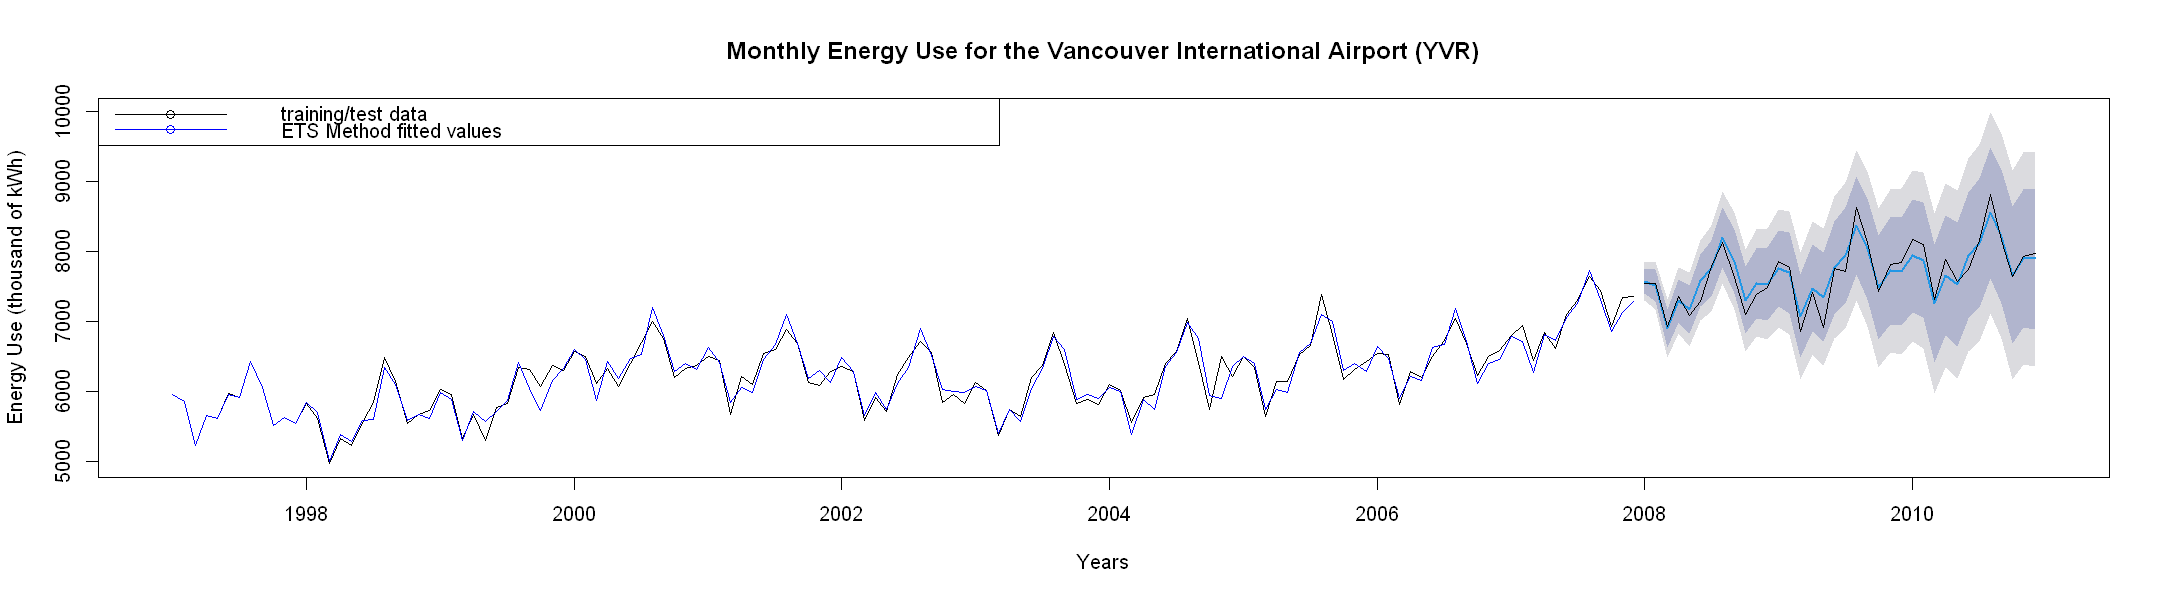

In [29]:
#Plotting training and test sets, along with ETS forecast on test set and the forecast interval 
plot(forecast(fit.arima.1,h = 36), ylab="Energy Use (thousand of kWh)", 
     xlab="Years", main="Monthly Energy Use for the Vancouver International Airport (YVR)")
lines(energy.train)
lines(energy.test)
lines(fitted(fit.arima.1), col = "blue")
legend("topleft",lty=1, col=c(1,"blue"), 
       c("training/test data", expression("ETS Method fitted values")),pch=1)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

In [30]:
accuracy(fit.arima.1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.495075,129.171,93.95688,0.1257726,1.494625,0.3545766,-0.01035696


This model has the lowest MAE, MASE and MAPE but a bit higher RMSE than two other models. Therefore, this model has a good fit for the training data. 
<br>

(For goodness of fit of other candidate models, please refer to Appendix B)

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [31]:
#Comparing arima with best ETS and drift model
cbind(method=c('Arima','ETS','Drift'),
    round(rbind(accuracy(forecast(fit.arima.1, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(forecast(energy_ets_maa, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(energy_d,energy.test)[2,c(2,3,5,6)]),2))

method,RMSE,MAE,MAPE,MASE
Arima,159.94,125.09,1.63,0.47
ETS,155.98,123.18,1.61,0.46
Drift,415.98,328.48,4.21,1.24


For accuracy measures of other candidate models, please refer to Appendix B.

## Accuracy of forecasts (1 mark)


This model seems to forecast the test set the best, because its forecast plot matches the test set best and it has lowest accuracy measures such as MAE and RMSE. From the plot we can see it almost shows every increase and decrease that in the test set. From the accuracy measures, the MASE (< 1) shows it has a better performance than the naive method on the training set. Compared to the best basic method (drift method), this arima model is better in showing seasonality in the plot and has better accuracy measures. 

## Residual diagnostics (3.5 marks)


The residuals are uncorrelated. In the ACF plot, there's one significant lag which we can consider as is due to chance. 

The residuals don't have a zero mean. The mean of the residuals is 9.495075, which indicates the forecasts are biased, and we need to add 9.495075 to all forecasts. 

- To do this, we can use this code: forecast(fit_arima_1, h = 36)$mean + mean(residuals(fit.arima.1))

Residuals have constant variance from the time plot.

Residuals are normally distributed from the ditribution plot.


Hypothesis Testing:

- H0: the first 24 autocorrelations are not significantly different from a white noise process

- HA: the first 24 autocorrelations are significantly different from a white noise process

- From the Ljung-Box test result, we can see that 24 lags are tested, where the test statistic is 17.722, and p-value is 0.7223 indicating that we failed to reject H0, so we cannot reject that the first 24 autocorrelations are not significantly different from a white noise process.


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,1)[12]
Q* = 17.722, df = 22, p-value = 0.7223

Model df: 2.   Total lags used: 24



[1] 9.495075

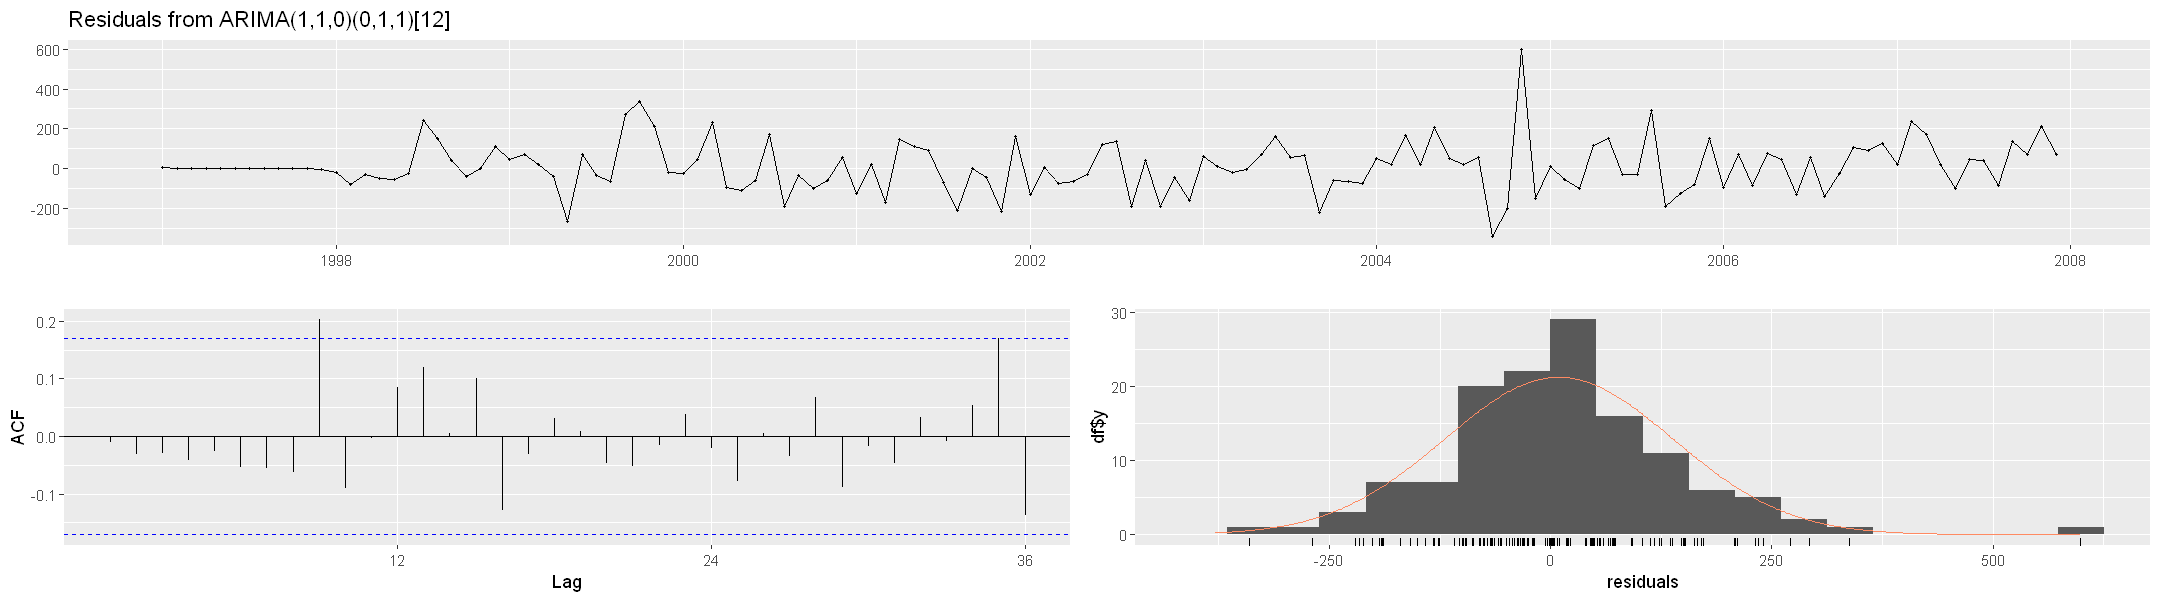

In [32]:
checkresiduals(fit.arima.1)
mean(residuals(fit.arima.1))

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  



Among the models that are tested, ETS(M,A,A) is the best forecasting method. From the error comparison side, ETS(M,A,A) has the lowest RMSE, MAE, MAPE and MASE, and residuals are having no bias. From the plot we would be able to see that Arima and drift method are also doing well. However, for Arima model, when we consider residuals, there is a significant lag on Acf plot, showing some bias on the residuals. For drift method, although it looks good on the plot, the error terms are higher than ETS(M,A,A), where RMSE, MAE, MAPE, MASE are 416, 328.5, 4.2 and 1.2 on the test set, much higher than the ETS model.
<br>

In conclusion, ETS(M,A,A) is the best model so far, on error terms, plot and residual sides.

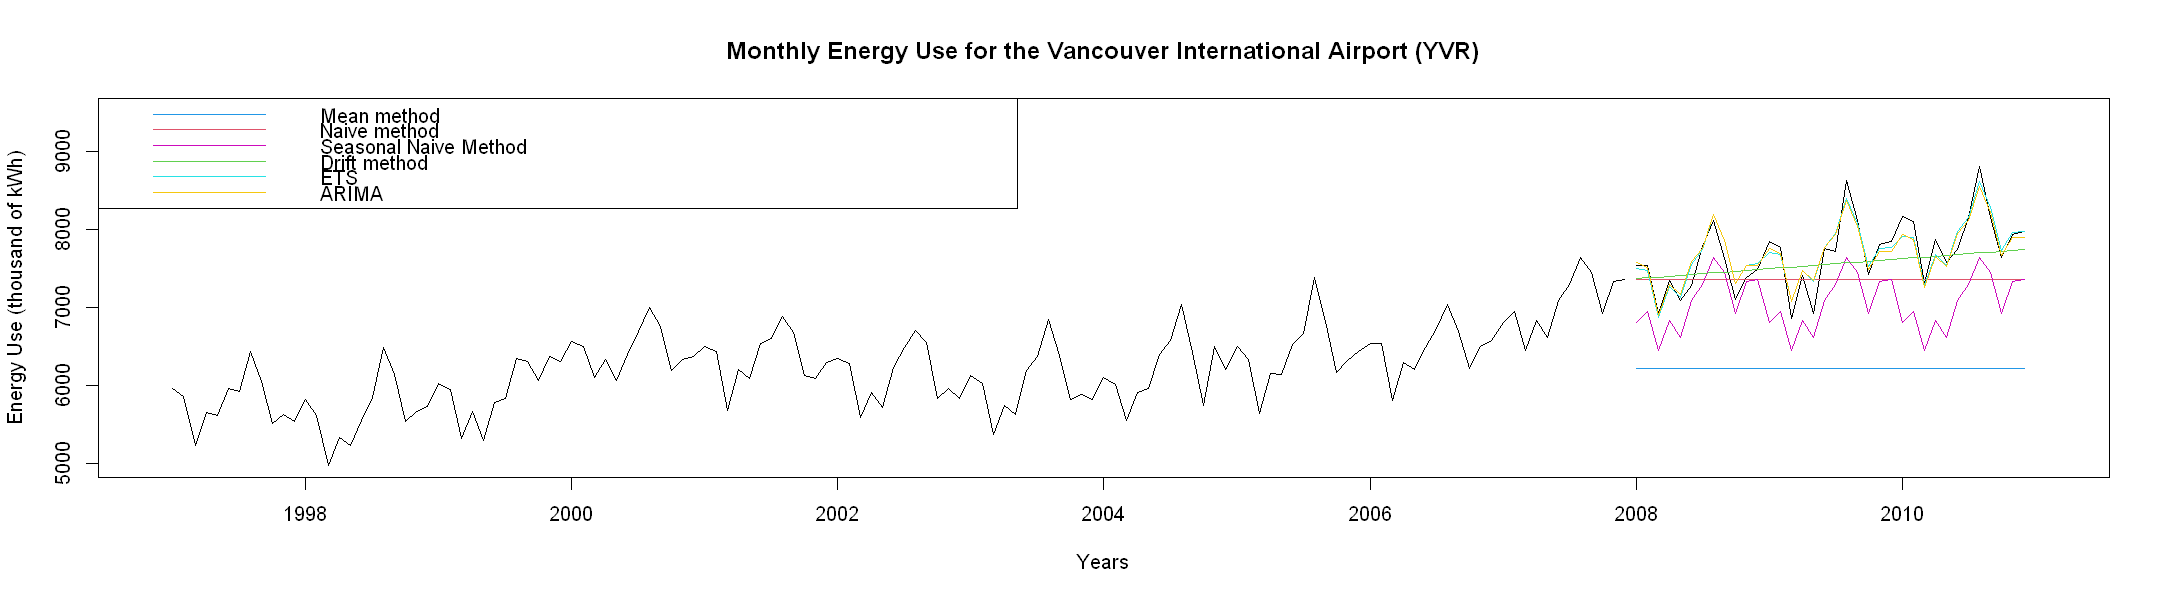

In [33]:
plot(energy.train, xlim=c(1997,2011), ylim=c(5000,9500),
     main="Monthly Energy Use for the Vancouver International Airport (YVR)", ylab="Energy Use (thousand of kWh)",
     xlab="Years")
lines(energy.test)
lines(energy_m$mean,col=4)
lines(energy_n$mean,col=2)
lines(energy_sn$mean,col=6)
lines(rwf(energy.train,drift=TRUE,h=36)$mean,col=3)
lines(forecast(energy_ets_maa, h = 36)$mean, col = 5)
lines(forecast(fit.arima.1, h = 36)$mean, col = 7)
legend("topleft",lty=1,col=c(4,2,6,3,5,7), legend=c("Mean method","Naive method",
                                                "Seasonal Naive Method",
                                              "Drift method","ETS","ARIMA"))

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)


In [34]:
# Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013)
forecast_2011 <- forecast(energy_ts, h=36)
forecast_2011

         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Jan 2011       8242.569 8014.124 8471.014 7893.192  8591.945
Feb 2011       8129.035 7850.044 8408.027 7702.355  8555.716
Mar 2011       7303.054 7012.046 7594.062 6857.996  7748.112
Apr 2011       7807.853 7458.857 8156.849 7274.110  8341.596
May 2011       7589.164 7216.738 7961.589 7019.588  8158.739
Jun 2011       8092.835 7663.179 8522.490 7435.733  8749.936
Jul 2011       8304.267 7832.363 8776.170 7582.553  9025.981
Aug 2011       8877.769 8342.147 9413.391 8058.606  9696.932
Sep 2011       8406.003 7870.980 8941.026 7587.757  9224.250
Oct 2011       7701.707 7187.238 8216.177 6914.894  8488.521
Nov 2011       7986.449 7428.913 8543.986 7133.771  8839.128
Dec 2011       7957.766 7379.254 8536.277 7073.008  8842.523
Jan 2012       8248.276 7625.720 8870.832 7296.159  9200.394
Feb 2012       8134.547 7498.770 8770.324 7162.210  9106.884
Mar 2012       7307.902 6717.787 7898.018 6405.399  8210.406
Apr 2012       7812.929 

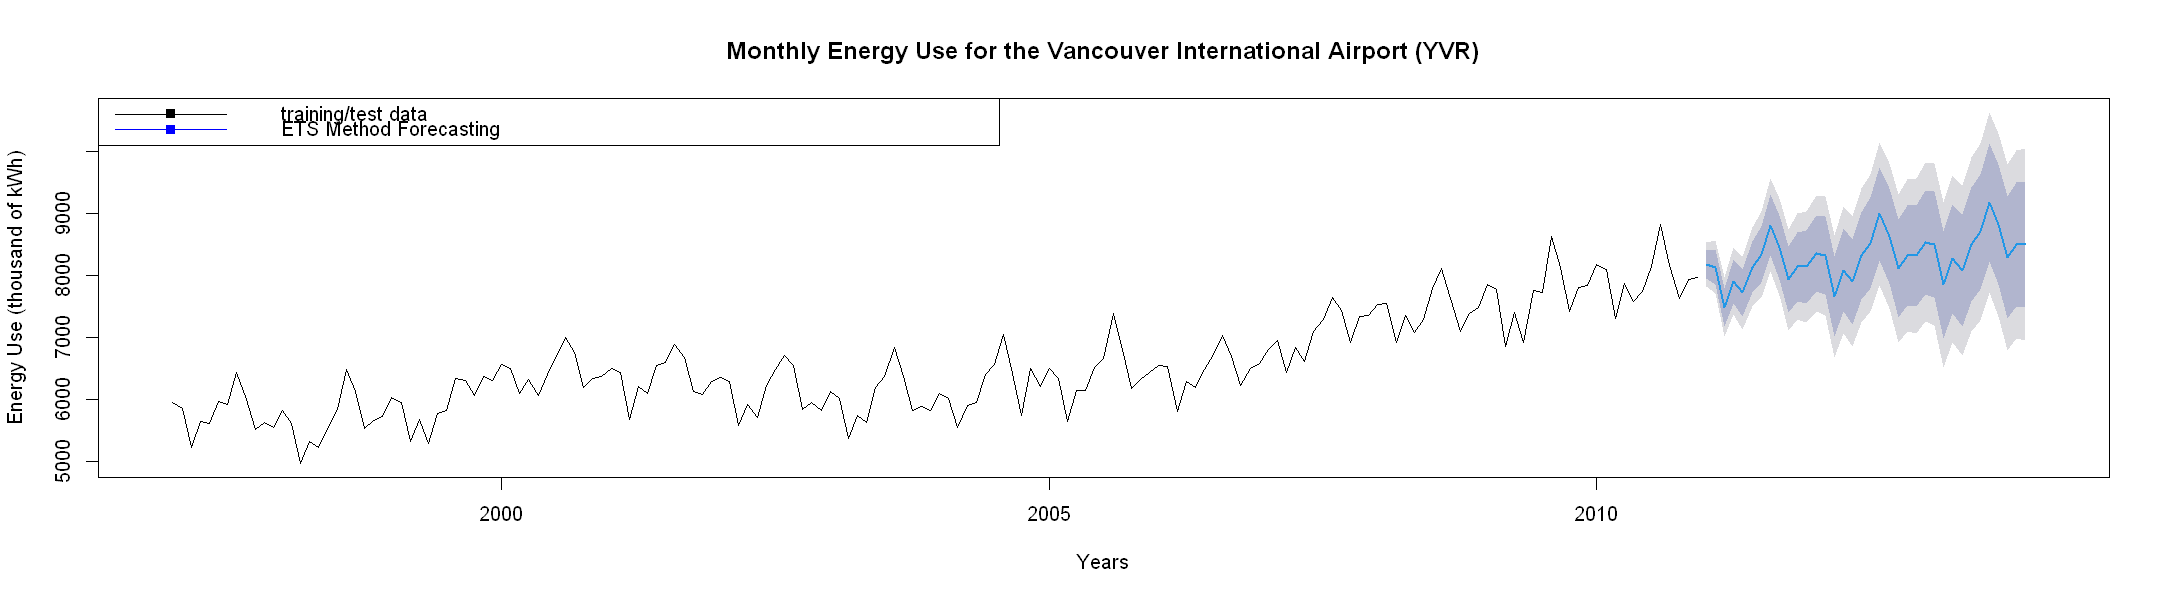

In [35]:
plot(forecast(ets(energy_ts, model="MAA", damped=FALSE),h = 36), ylab="Energy Use (thousand of kWh)", 
     xlab="Years", main="Monthly Energy Use for the Vancouver International Airport (YVR)",xlim=c(1997,2014))
lines(energy.train, col=1,xlim=c(1997,2010))
lines(energy.test,col=1,xlim=c(1997,2010))
legend("topleft",lty=1, col=c(1,"blue"), 
       c("training/test data",expression("ETS Method Forecasting")),pch=15)

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)


1. Compared to regression model, models for time series only considered the dependent variable itself, and it fails to consider other related aspects. For example in this dataset, ETS and other time serie models do not consider the information on date, energy use, temperature, terminal area, and number of passengers, and only care about patterns on energy use itself. In this case, we would combine results of our explanatory analysis and ETS model to make the prediction.
<br>

2. Another limitation for ETS model is that we can only choose to fit in a few selections of patters, for example, additive trend or multiplicative trend. In this case, we can only capture the overall trend of the time series, but not the detail variations. For example in this project, we failed to consider the drop in early 2000, because the overall trend was increasing. Thus, we may miss some of the important information from the dataset. One recommendation is to include the information given by other candidate models such as ARIMA to have a more comprehensive picture.
<br>

3. Our project is based on the assumption that YVR is relying on the current structure of energy -- solely on Hydroelectric power, and part on natrual gas and other renewable resources. Thus, our prediction will be only valid if YVR does not change its energy sources, and if it does, the energy useage may be affected largely. In 2020, BC's government announced a plan to achieve net-zero emissions by 2050, which includes a focus on increasing the use of renewable energy and reducing the province's dependence on fossil fuels, meaning that it is quite possible that YVR will change the structure of energy useage to a more sustainable and renewable way, so we would conduct more detailed analysis on it to validate the results of our project.

<div class="alert alert-block alert-success">
<a id="Explanatory"></a>

# Explanatory model (200 words max.) (2 marks)


First, split the whole dataset into training data and test data. The training data is from 1997 to 2007, the test data is from 2008 to 2010. 

Second, create scatter plots to evaluate the relationships of the response variable (energy) and the explanatory variables (mean.temperature, total.area, total.passengers, domestic.passenger, US.passenger, international.passenger), mainly looking into the the form, direction, strength, and any outliers and discuss the reason of outliers. And transform variable(s) if necessary to improve linearity, equal variance. 

Third, build up candidate models to fit training data and check residuals to see if or not meeting the assumptions of linearity, equal variance, normality. Besides, test significance of the regression, test individual variables in the regression, calculate CI’s for co-efficients, assess goodness of fit on training data, and calculate accuracy measures on test data. Also, plot the forecasts and test data to see which model matches the best.

Finally, compare various parameters to choose the best model, such as R-squared, MAE, RMSE. Use the best model for prediction from 2011 to 2013. 

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

In [36]:
# candidate models
energy_ets_aaa <- ets(energy.train, model="AAA", damped=FALSE) 
energy_ets_aada <- ets(energy.train, model="AAA", damped=TRUE) 
energy_ets_mada <- ets(energy.train, model="MAA", damped=TRUE)
energy_ets_auto <- ets(energy.train)

In [37]:
# accuracy measures of training set
cbind(method=c('AAA','AADA','MADA','AUTO'),
    round(rbind(accuracy(energy_ets_aaa),
accuracy(energy_ets_aada),
accuracy(energy_ets_mada),
accuracy(energy_ets_auto)),2))

,method,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,AAA,-1.17,126.26,98.96,-0.06,1.59,0.37,0.01
Training set,AADA,9.05,126.77,99.15,0.1,1.59,0.37,-0.01
Training set,MADA,14.36,127.24,99.54,0.19,1.6,0.38,-0.02
Training set,AUTO,12.74,126.65,98.1,0.17,1.57,0.37,-0.01


In [38]:
# accuracy measures of test set
cbind(method=c('AAA','AADA','MADA','AUTO'),
    round(rbind(accuracy(forecast(energy_ets_aaa, 36), energy.test)[2,c(2,3,5,6)], 
accuracy(forecast(energy_ets_aada, 36), energy.test)[2,c(2,3,5,6)], 
accuracy(forecast(energy_ets_mada, 36), energy.test)[2,c(2,3,5,6)],
accuracy(forecast(energy_ets_auto, 36), energy.test)[2,c(2,3,5,6)]), 2))

method,RMSE,MAE,MAPE,MASE
AAA,189,155.9,2,0.59
AADA,381.16,312.71,3.97,1.18
MADA,396.5,325.62,4.13,1.23
AUTO,386.41,315.94,4.01,1.19


---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

In [39]:
# candidate models
fit.arima.1 <- Arima(energy.train, order=c(1, 1, 0), seasonal=c(0, 1, 1))
fit.arima.2 <- Arima(energy.train, order=c(1, 1, 0), seasonal=c(3, 1, 0))
fit.arima.3 <- Arima(energy.train, order=c(0, 1, 2), seasonal=c(0, 1, 1))
fit.arima.4 <- Arima(energy.train, order=c(0, 1, 2), seasonal=c(3, 1, 0))
fit.arima.5 <- Arima(energy.train, order=c(1, 1, 0), seasonal=c(1, 1, 0))
fit.arima.6 <- Arima(energy.train, order=c(0, 1, 1), seasonal=c(0, 1, 1))
fit.arima.7 <- Arima(energy.train, order=c(0, 1, 1), seasonal=c(1, 1, 0))
fit.arima.auto <- auto.arima(energy.train, stepwise = FALSE, approximation = FALSE)

In [40]:
# accuracy measures of training set
cbind(method=c('Auto','Arima2','Arima3','Arima4','Arima5','Arima6','Arima7'),
    round(rbind(accuracy(fit.arima.auto),
accuracy(fit.arima.2),
accuracy(fit.arima.3),
accuracy(fit.arima.4),
accuracy(fit.arima.5),
accuracy(fit.arima.6),
accuracy(fit.arima.7)),2))

,method,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,Auto,9.9,146.22,104.95,0.13,1.67,0.4,-0.01
Training set,Arima2,10.77,137.37,99.2,0.14,1.58,0.37,0
Training set,Arima3,9.82,128.82,94.25,0.13,1.5,0.36,-0.01
Training set,Arima4,10.81,137.41,99.43,0.14,1.58,0.38,-0.01
Training set,Arima5,9.25,149.68,110.42,0.12,1.76,0.42,-0.01
Training set,Arima6,9.85,128.78,94.26,0.13,1.5,0.36,-0.01
Training set,Arima7,9.69,149.68,110.05,0.13,1.75,0.42,-0.01


In [41]:
# accuracy measures of test set
cbind(method=c('Auto','Arima2','Arima3','Arima4','Arima5','Arima6','Arima7'),
    round(rbind(accuracy(forecast(fit.arima.auto, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(forecast(fit.arima.2, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(forecast(fit.arima.3, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(forecast(fit.arima.4, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(forecast(fit.arima.5, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(forecast(fit.arima.6, h = 36),energy.test)[2,c(2,3,5,6)],
accuracy(forecast(fit.arima.7, h = 36),energy.test)[2,c(2,3,5,6)]),2))

method,RMSE,MAE,MAPE,MASE
Auto,532.03,459.58,5.99,1.73
Arima2,513.32,466.56,6.09,1.76
Arima3,161.33,127.82,1.66,0.48
Arima4,510.18,463.33,6.05,1.75
Arima5,678.12,586.74,7.62,2.21
Arima6,161.63,128.23,1.67,0.48
Arima7,665.25,573.84,7.46,2.17
